<a href="https://colab.research.google.com/github/ilyesBoukraa/K_means_img_segmentation/blob/main/K_means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageOps

# Image segmentation using K-means
## an unsupervised machine learning model!

In [ ]:
class K_Means():
    def __init__(self)->None:
        pass
    # Note for me in the future  i am not satisfied at all with this monster
    # i mean C'mon! look at the complexity!
    def k_means(self, image, clusters=2):
        im = np.array(image)
        width,height = im.shape
        array = im.flatten()
        l = np.zeros(clusters)
        means = np.zeros_like(l)
        lengh = len(array)
        blank_imgs = np.zeros((clusters,lengh))
        distances = np.zeros((clusters,lengh))
        cluster_array = np.zeros_like(array)
        test = np.zeros_like(array)
        elements = round(lengh / clusters)
        fig = plt.figure(figsize=(24,8))
        axs = fig.subplots(nrows=1,ncols=clusters)

        for i in range(clusters):
            x = lengh - elements
            if x < elements:
                elements +=  x
            l[i] = elements
            lengh -= elements
        start = 0
        end = 0
        iter = 10
        for i in range(clusters):
            end += int(l[i])
            arr = array[start:end]
            means[i] = np.sum(arr) / l[i]
            start += int(l[i])

        for i in range(iter):
            col = 0
            index = 0
            Ltest = l.copy()
            for j in array:
                lin = 0
                for k in means:
                    minus = j-k
                    power = np.power(minus,2)
                    distances[lin,col] = np.sqrt(power)
                    lin += 1
                col += 1
            for k in distances.T:
                minum = np.min(k)
                cluster = np.array(np.where(k == minum))
                cluster_array[index] = cluster
                index +=1
            for k in range(clusters):
                w = np.where(cluster_array == k)
                w = np.array(w)
                l[k] = len(w[0])
                means[k] = np.sum(array[w]) / l[k]
                blank_imgs[k][w] = array[w]
            if np.array_equal(l,Ltest):
                break

        for k in range(clusters):
            test = blank_imgs[k].reshape((width,height))
            img = Image.fromarray(test)
            axs[k].imshow(img)


        plt.show()

# Loading Our Data.

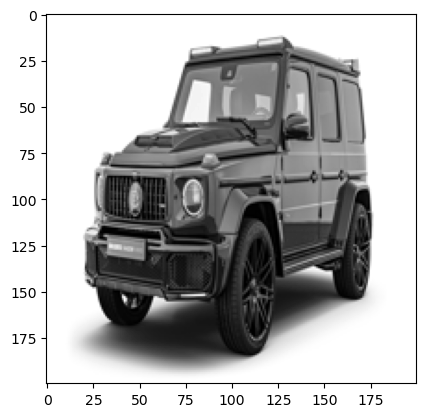

In [ ]:
PATH = 'images\\Class_G.jpg'
image = Image.open(PATH)
image = image.resize((200,200))
image = ImageOps.grayscale(image)
plt.imshow(image, cmap='gray')
plt.show()

# Testing the Code.

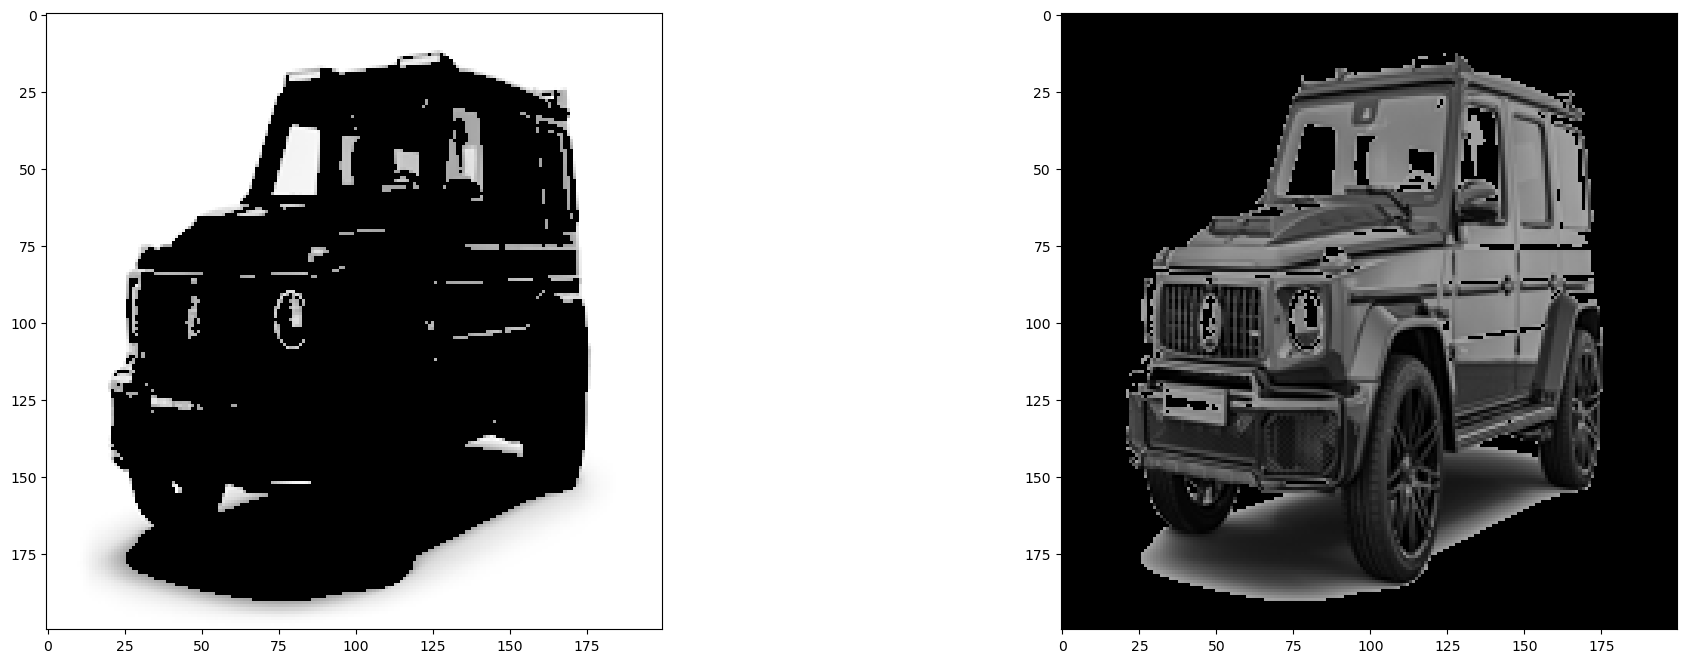

In [ ]:
k = 2
img_segmentation = K_Means()
img_segmentation.k_means(image,k)